# Project 2


Rodrigo Amortegui  Aros	Código: 199827026
Jeimmy Rocio Espinel Farias	Código: 201628049
Luis Ferney Rincon Martinez	Código: 271728024
# Nombre en Kaggle

Rodrigo Amortegui



# Movie Genre Classification

Classify a movie genre based on its plot.


https://www.kaggle.com/c/miia4200-20191-p2-moviegenreclassification/overview


### Data

Input:
- movie plot, Year, title

Output:
Probability of the movie belong to each genre

## Importamos las librerias

In [0]:
import pandas as pd #clasificacion multilabel multiclass- la suma de las probabilidades no da 1
import os #evalua el AUC agrupado, columna de 1 y 0 y saca promedio
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
dataTraining = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

# EXPLORACION DE DATOS

In [0]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [0]:
dataTraining.shape

(7895, 5)

In [0]:
dataTraining = dataTraining.reset_index(drop=True)

In [0]:
dataTraining.isnull().sum()

year      0
title     0
plot      0
genres    0
rating    0
dtype: int64

In [0]:
dataTraining.describe()

,year,rating
count,7895.000000,7895.000000
mean,1989.726409,6.402812
std,22.660717,1.078260
min,1894.000000,1.200000
25%,1980.000000,5.800000
50%,1997.000000,6.500000
75%,2007.000000,7.200000
max,2015.000000,9.300000


(array([3.000e+00, 1.000e+00, 1.000e+00, 1.600e+01, 3.800e+01, 5.100e+01,
        1.350e+02, 1.980e+02, 2.210e+02, 2.300e+02, 2.460e+02, 2.150e+02,
        2.760e+02, 2.760e+02, 4.260e+02, 6.740e+02, 8.440e+02, 1.044e+03,
        1.376e+03, 1.624e+03]),
 array([1894.  , 1900.05, 1906.1 , 1912.15, 1918.2 , 1924.25, 1930.3 ,
        1936.35, 1942.4 , 1948.45, 1954.5 , 1960.55, 1966.6 , 1972.65,
        1978.7 , 1984.75, 1990.8 , 1996.85, 2002.9 , 2008.95, 2015.  ]),
 <a list of 20 Patch objects>)

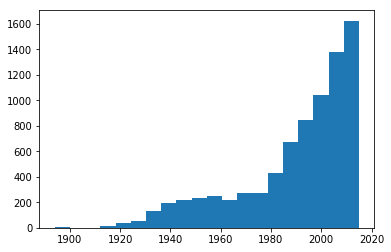

In [0]:
import matplotlib.pyplot as plt
plt.hist(dataTraining["year"], bins = 20)

In [0]:
dataTraining['genres'].value_counts()

['Drama']                                                           429
['Comedy']                                                          368
['Comedy', 'Drama', 'Romance']                                      306
['Comedy', 'Romance']                                               291
['Comedy', 'Drama']                                                 287
['Drama', 'Romance']                                                282
['Documentary']                                                     154
['Crime', 'Drama', 'Thriller']                                      125
['Horror']                                                          115
['Drama', 'Thriller']                                               115
['Horror', 'Thriller']                                              108
['Action', 'Crime', 'Drama', 'Thriller']                            102
['Crime', 'Drama']                                                   88
['Action', 'Crime', 'Thriller']                                 

In [0]:
dataTraining['year'].value_counts()

2013    288
2012    277
2009    268
2008    268
2011    266
2007    263
2006    259
2014    242
2010    234
2005    223
2004    202
1997    184
2001    179
2002    176
2000    169
1999    168
1998    168
1995    167
2003    161
1996    158
1994    137
1988    136
1993    135
1992    124
1990    124
1991    123
1989    117
1987    116
1985     91
1986     90
       ... 
1935     28
1960     28
1937     26
1961     26
1932     23
1933     23
1938     19
1931     17
1934     16
1928     15
1921      9
1925      8
1922      8
1930      8
1929      7
1923      7
1927      7
1924      6
1926      6
1920      5
1916      5
1915      5
1917      3
1919      3
1894      2
1918      2
1910      1
1914      1
1903      1
1896      1
Name: year, Length: 106, dtype: int64

In [0]:
dataTraining['rating'].value_counts()

6.5    333
7.2    320
6.4    316
6.7    312
7.0    309
6.8    303
7.1    286
7.3    282
6.6    280
6.1    278
6.2    278
6.9    268
6.3    267
5.9    254
7.4    234
7.6    226
6.0    216
5.7    212
7.5    211
5.6    210
5.8    192
7.7    176
5.5    173
7.8    162
5.4    143
5.3    139
8.0    126
5.2    119
7.9    118
5.1    105
      ... 
8.4     19
3.7     19
3.8     19
3.3     17
8.5     16
3.6     13
3.4     12
8.6     11
2.7     11
2.8     10
3.1      9
3.2      7
2.4      7
3.0      6
1.9      6
8.7      6
2.9      6
2.5      5
8.8      5
2.2      5
2.6      4
2.3      4
8.9      4
2.1      3
9.0      2
1.6      2
9.3      1
1.8      1
1.2      1
1.7      1
Name: rating, Length: 76, dtype: int64

In [0]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [0]:
dataTesting.isnull().sum()

year     0
title    0
plot     0
dtype: int64

# Creamos Y

In [0]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])


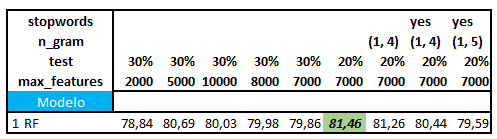

# Primer modelo Rf (max_features=7000)

In [0]:
vect = CountVectorizer(max_features=7000)
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.20, random_state=42)

clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))

clf.fit(X_train, y_train_genres)

y_pred_genres = clf.predict_proba(X_test)

roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.830667519795647

vaciones del modelo 1

# Seundo modelo RF ClassifierChain ()

In [0]:
!pip install scikit-multilearn
from skmultilearn.problem_transform import ClassifierChain
classifier = ClassifierChain(RandomForestClassifier())
classifier.fit(X_train, y_train_genres)
y_pred_genres_3 = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy = ",accuracy_score(y_test_genres,y_pred_genres_3))

    100% |████████████████████████████████| 92kB 3.4MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy =  0.06523115896136795


Modelo con SVM

In [0]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVR
y_r_rbf = svr_rbf.fit(X_train, y_train_genres)
R_r=y_r_rbf.predict(X_test)
r_rbf=sum(R_r==y_test_genres)/len(y_test_genres)

#  RF Unificado Year y plot

In [0]:
def concat(*args): 
    strs = [str(arg) for arg in args if not pd.isnull(arg)] 
    return ','.join(strs) if strs else np.nan 
np_concat = np.vectorize(concat) 
dataTraining['X_Tot'] = np_concat(dataTraining['plot'], dataTraining['year']) 
vect = CountVectorizer(ngram_range=(1, 5),lowercase=False,max_features=7000)
X_dtm = vect.fit_transform(dataTraining['X_Tot'])
X_dtm.shape

(7895, 7000)

In [0]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.20, random_state=42)

In [0]:
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          n_jobs=None)

In [0]:
clf.fit(X_train, y_train_genres)
y_pred_genres = clf.predict_proba(X_test)
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.8223636236989332

# RF Unificado Year, plot y title count vectorizer

In [0]:
Plot_pro= dataTraining['plot']

Plot_pro.replace('!','')
Plot_pro.replace('"','')
Plot_pro.replace('$','')
Plot_pro.replace('%','')
Plot_pro.replace('&','')
Plot_pro.replace('-','')
Plot_pro.replace('/','')
Plot_pro.replace('.','')
Plot_pro.replace('?','')

title_pro = dataTraining['title']

title_pro.replace('!','')
title_pro.replace('"','')
title_pro.replace('$','')
title_pro.replace('%','')
title_pro.replace('&','')
title_pro.replace('-','')
title_pro.replace('/','')
title_pro.replace('.','')
title_pro.replace('?','')

Tit_ano= dataTraining['year']

wordnet_lemmatizer = WordNetLemmatizer()

def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]
  
vect = CountVectorizer(max_features=9000,stop_words='english',analyzer=split_into_lemmas,ngram_range=(1, 8))
#stop_words=('english')
X_dtm = vect.fit_transform(Plot_pro)
X_dtm.shape

vect2 = CountVectorizer(max_features=4000,stop_words='english',analyzer=split_into_lemmas,ngram_range=(1, 8))
X_dtm2 = vect2.fit_transform(title_pro)
X_dtm2.shape

X_dtm =pd.DataFrame(X_dtm.todense())

X_dtm2 =pd.DataFrame(X_dtm2.todense())

pattern = r'[^a-zA-Z0-9\s]'
Plot_pro = dataTraining['plot'].replace(pattern,'')
resu = pd.concat([X_dtm, Tit_ano], axis=1)
result = pd.concat([X_dtm2, resu], axis=1)



In [0]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=300, max_depth=11, random_state=42))

In [0]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(result, y_genres, test_size=0.20, random_state=42)

In [0]:
clf.fit(X_train, y_train_genres)
y_pred_genres = clf.predict_proba(X_test)
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.8518888314633873

# Modelo TfidfVectorizer

In [0]:
pattern = r'[^a-zA-Z0-9\s]'
Plot_pro = dataTraining['plot'].replace(pattern,'')
Plot_pro.head()
title_pro = dataTraining['title'].replace(pattern,'')
Tit_ano= dataTraining['year']
Tit_ano.head()
wordnet_lemmatizer = WordNetLemmatizer()
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]
vect = TfidfVectorizer(max_features=9000,stop_words='english',analyzer=split_into_lemmas,ngram_range=(1, 8))
X_dtm = vect.fit_transform(Plot_pro)
X_dtm.shape
vect2 = TfidfVectorizer(max_features=7000,stop_words='english',analyzer=split_into_lemmas,ngram_range=(1, 8))
X_dtm2 = vect2.fit_transform(title_pro)
X_dtm2.shape
X_dtm =pd.DataFrame(X_dtm.todense())
X_dtm2 =pd.DataFrame(X_dtm2.todense())
resu = pd.concat([X_dtm, Tit_ano], axis=1)
result = pd.concat([X_dtm2, resu], axis=1)

In [0]:
from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=300, max_depth=11, random_state=42)), result, y_genres, cv=2,scoring='roc_auc') 

np.average(scores1) 

0.8427161341604452

# Modelo TfidfVectorizer adicionando data externa de 1000 peliculas 

In [0]:
dataTraining = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [0]:
data = pd.read_csv("add_data.csv")
dataTraining = pd.concat([dataTraining, data])
dataTraining = dataTraining.reset_index(drop=True)
pattern = r'[^a-zA-Z0-9\s]'


In [0]:
wordnet_lemmatizer = WordNetLemmatizer()

def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

In [0]:
#Creamos X
vect = TfidfVectorizer(max_features=9000,stop_words='english',analyzer=split_into_lemmas,ngram_range=(1, 8))
vect2 = TfidfVectorizer(max_features=4000,stop_words='english',analyzer=split_into_lemmas,ngram_range=(1, 8))

In [0]:
#Creamos Y
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [0]:
  Plot_pro = dataTraining['plot'].replace(pattern,'')
  title_pro = dataTraining['title'].replace(pattern,'')
  Tit_ano= dataTraining['year']
  wordnet_lemmatizer = WordNetLemmatizer()
  X_dtm = vect.fit_transform(Plot_pro)
  X_dtm2 = vect2.fit_transform(title_pro)
  X_dtm =pd.DataFrame(X_dtm.todense())
  X_dtm2 =pd.DataFrame(X_dtm2.todense())
  resu = pd.concat([X_dtm, Tit_ano], axis=1)
  result = pd.concat([X_dtm2, resu], axis=1)

In [0]:
  dataT = dataTesting
  dataTesting = dataTesting.reset_index(drop=True)
  X_test_dtm1 = vect.transform(dataTesting['plot'].replace(pattern,''))
  X_test_dtm2= vect2.transform(dataTesting['title'].replace(pattern,''))
  Tit_ano_tes= dataTesting['year']
  X_test_dtm1 =pd.DataFrame(X_test_dtm1.todense())
  X_test_dtm2 =pd.DataFrame(X_test_dtm2.todense())
  resu_tes = pd.concat([X_test_dtm1, Tit_ano_tes], axis=1)
  X_test_dtm = pd.concat([X_test_dtm2,resu_tes], axis=1)

In [0]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, 
                                                 n_estimators=300,
                                                 criterion='gini',
                                                 max_leaf_nodes= None,
                                                 max_depth=10,
                                                 random_state=42))

In [0]:
clf.fit(result, y_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          n_jobs=None)

In [0]:
scores1 = cross_val_score(OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=300, max_depth=11, random_state=42)), result, y_genres, cv=2,scoring='roc_auc') 

np.average(scores1) 

0.8663116134160

# Modelo Final

In [ ]:
dataTraining = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [ ]:
data = pd.read_csv("add_data.csv")
dataTraining = pd.concat([dataTraining, data])
dataTraining = dataTraining.reset_index(drop=True)
pattern = r'[^a-zA-Z0-9\s]'

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

In [ ]:
#Creamos X
vect = TfidfVectorizer(max_features=9000,stop_words='english',analyzer=split_into_lemmas,ngram_range=(1, 8))
vect2 = TfidfVectorizer(max_features=4000,stop_words='english',analyzer=split_into_lemmas,ngram_range=(1, 8))

In [ ]:
#Creamos Y
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [ ]:
  Plot_pro = dataTraining['plot'].replace(pattern,'')
  title_pro = dataTraining['title'].replace(pattern,'')
  Tit_ano= dataTraining['year']
  wordnet_lemmatizer = WordNetLemmatizer()
  X_dtm = vect.fit_transform(Plot_pro)
  X_dtm2 = vect2.fit_transform(title_pro)
  X_dtm =pd.DataFrame(X_dtm.todense())
  X_dtm2 =pd.DataFrame(X_dtm2.todense())
  resu = pd.concat([X_dtm, Tit_ano], axis=1)
  result = pd.concat([X_dtm2, resu], axis=1)

In [ ]:
  dataT = dataTesting
  dataTesting = dataTesting.reset_index(drop=True)
  X_test_dtm1 = vect.transform(dataTesting['plot'].replace(pattern,''))
  X_test_dtm2= vect2.transform(dataTesting['title'].replace(pattern,''))
  Tit_ano_tes= dataTesting['year']
  X_test_dtm1 =pd.DataFrame(X_test_dtm1.todense())
  X_test_dtm2 =pd.DataFrame(X_test_dtm2.todense())
  resu_tes = pd.concat([X_test_dtm1, Tit_ano_tes], axis=1)
  X_test_dtm = pd.concat([X_test_dtm2,resu_tes], axis=1)

In [ ]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, 
                                                 n_estimators=1000,
                                                 criterion='gini',
                                                 max_leaf_nodes= None,
                                                 min_samples_leaf = 1,
                                                 min_samples_split=3,
                                                 oob_score=True,
                                                 max_depth=10,
                                                 random_state=42))

In [ ]:
clf.fit(result, y_genres)

In [ ]:
scores1 = cross_val_score(OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=300, max_depth=11, random_state=42)), result, y_genres, cv=2,scoring='roc_auc') 

np.average(scores1) 

0.88077

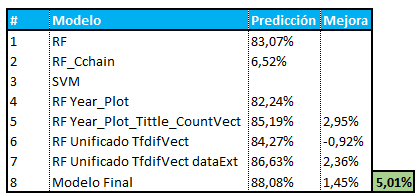

In [0]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

In [0]:
y_pred_test_genres = clf.predict_proba(X_test_dtm)

In [0]:
res = pd.DataFrame(y_pred_test_genres, index=dataT.index, columns=cols)


In [0]:
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.149064,0.119495,0.031212,0.044335,0.399260,0.146094,0.037116,0.512557,0.073833,0.095680,...,0.025135,0.089547,0.000037,0.284553,0.071363,0.007561,0.023199,0.231647,0.028256,0.019400
4,0.168004,0.115696,0.027879,0.057555,0.352409,0.201782,0.057201,0.512857,0.083771,0.075825,...,0.028789,0.075965,0.000263,0.172131,0.073164,0.007717,0.023352,0.225138,0.039218,0.019607
5,0.170577,0.117295,0.027821,0.043862,0.303901,0.351756,0.021491,0.572939,0.070876,0.076387,...,0.028113,0.172748,0.003353,0.249711,0.077132,0.007482,0.027012,0.385400,0.030648,0.029137
6,0.159636,0.132796,0.027821,0.040168,0.340591,0.157487,0.028830,0.571430,0.070322,0.078861,...,0.031011,0.098383,0.000012,0.267417,0.100682,0.007560,0.027890,0.281112,0.056855,0.025870
7,0.151908,0.145667,0.030826,0.043867,0.343032,0.185606,0.024924,0.456421,0.078158,0.110245,...,0.043929,0.132308,0.003352,0.219221,0.254603,0.007611,0.023248,0.231995,0.031054,0.025473


In [0]:
res.to_csv('pred_genres_text_RF.csv', index_label='ID')

# Api y App

[Api](52.226.66.146:8080)

[App](52.226.66.146:8081)